# Gaussian CDF and PDF with Quantiles

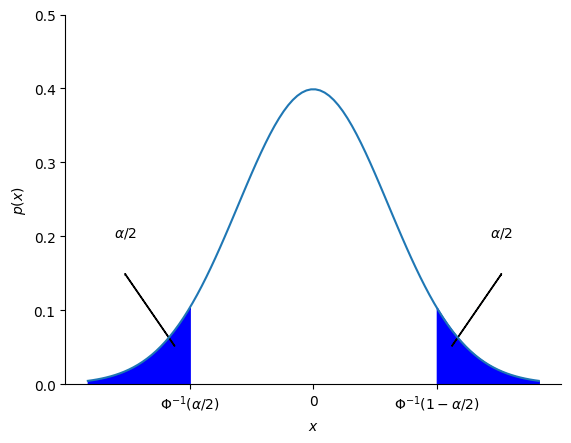

In [23]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt

try:
    from probml_utils import latexify, savefig, is_latexify_enabled
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, savefig, is_latexify_enabled

from jax.scipy.stats import norm

latexify(width_scale_factor=2, fig_height=1.5)

x = jnp.linspace(-3, 3, 100)

plt.plot(x, norm.pdf(x))
# percentage based change using norm.ppf
x_sep_left = norm.ppf(0.050)
# percentage based change using norm.ppf
x_sep_right = norm.ppf(0.950)
x_fill_left = jnp.linspace(-3, x_sep_left, 100)
x_fill_right = jnp.linspace(x_sep_right, 3, 100)
plt.fill_between(x_fill_left, norm.pdf(x_fill_left), color="b")
plt.fill_between(x_fill_right, norm.pdf(x_fill_right), color="b")

# Arrows,labels and annotations after this

arrow_x_left = x_sep_left - 0.2
arrow_x_right = x_sep_right + 0.2
arrow_y_left = 0.5 * norm.pdf(x_sep_left)
arrow_y_right = 0.5 * norm.pdf(x_sep_right)

plt.arrow(arrow_x_left, arrow_y_left, -2.5 - arrow_x_left, 0.2 - norm.pdf(x_sep_left))
plt.text(-2.5, 0.2, r"$\alpha/2$", horizontalalignment="center")


plt.arrow(arrow_x_right, arrow_y_right, 2.5 - arrow_x_right, 0.2 - norm.pdf(x_sep_left))
plt.text(2.5, 0.2, r"$\alpha/2$", horizontalalignment="center")


plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.ylim([0, 0.5])


sns.despine()
ax = plt.gca()

ax.set_xticks([x_sep_left, 0, x_sep_right])
ax.set_xticklabels([r"$\Phi ^{-1}(\alpha/2)$", 0, r"$\Phi ^{-1}(1-\alpha/2)$"])
savefig("gaussianQuantile.pdf")